In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading dataset
house = pd.read_csv("train.csv", na_values="NAN")

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Density'>

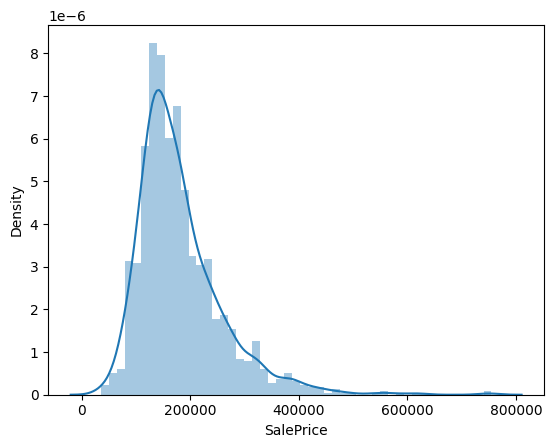

In [6]:
sns.distplot(house['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

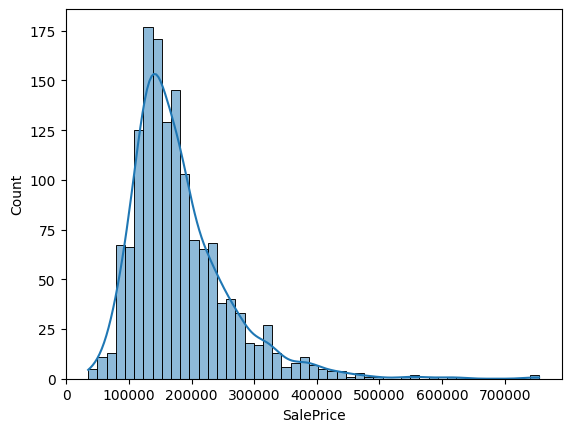

In [7]:
sns.histplot(house['SalePrice'], kde='true')

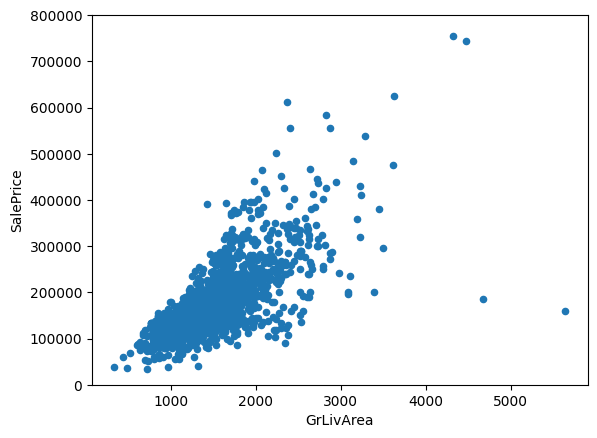

In [8]:
d1 = pd.concat([house['SalePrice'], house['GrLivArea']], axis=1)
d1.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

<Axes: >

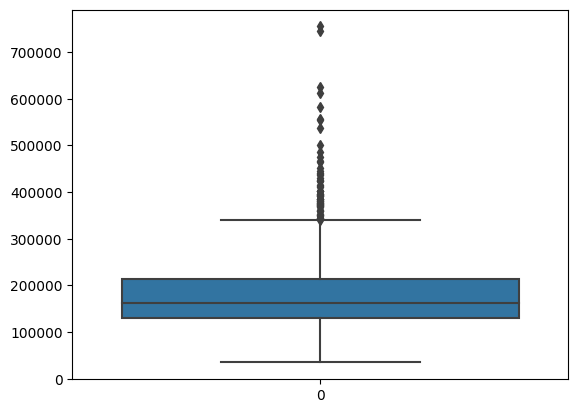

In [9]:
sns.boxplot(d1['SalePrice'])

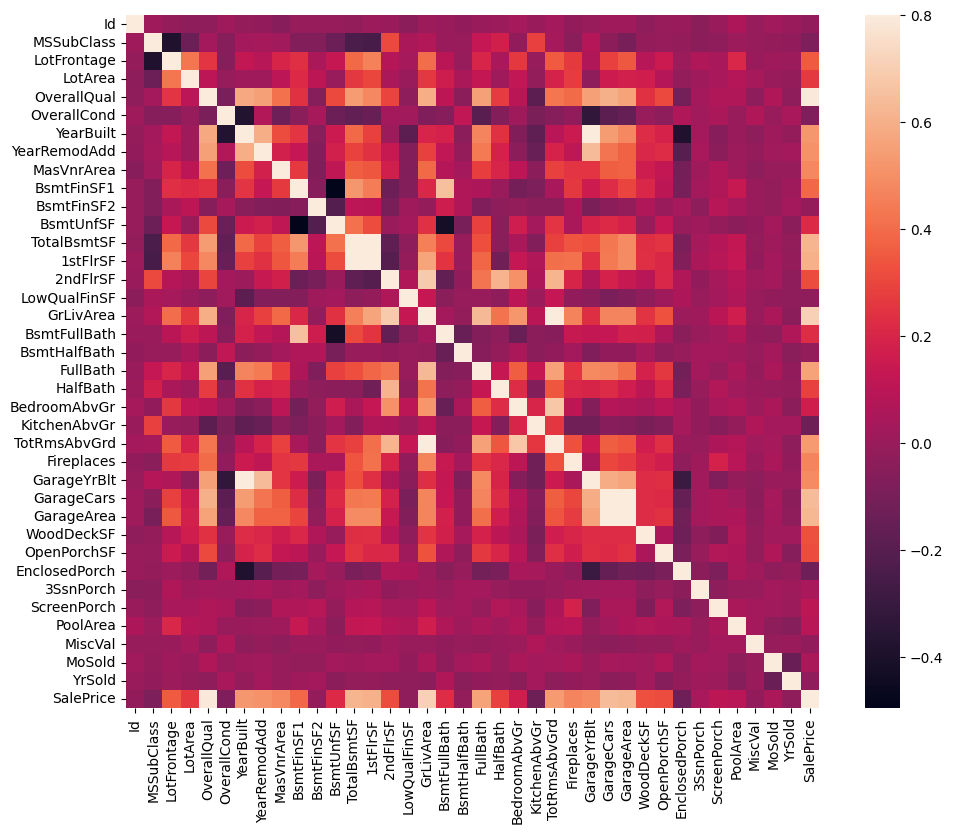

In [10]:
#correlation matrix
corre = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corre, vmax=.8, square=True);

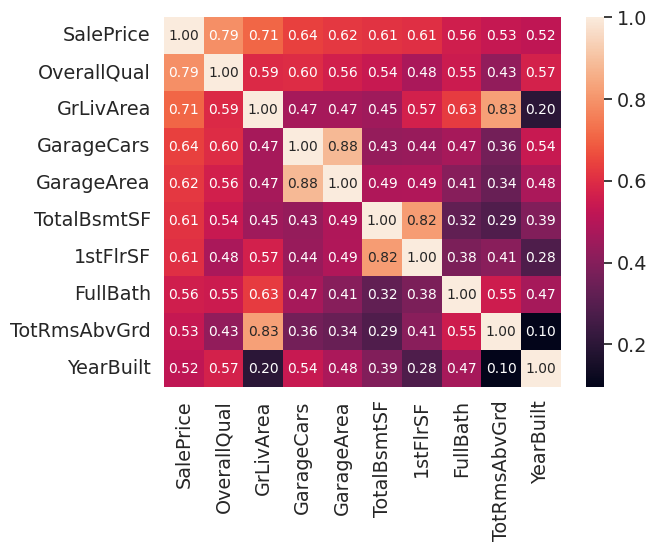

In [11]:
cls = corre.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cls].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,  annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cls.values, xticklabels=cls.values)
plt.show()

In [12]:
cls

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

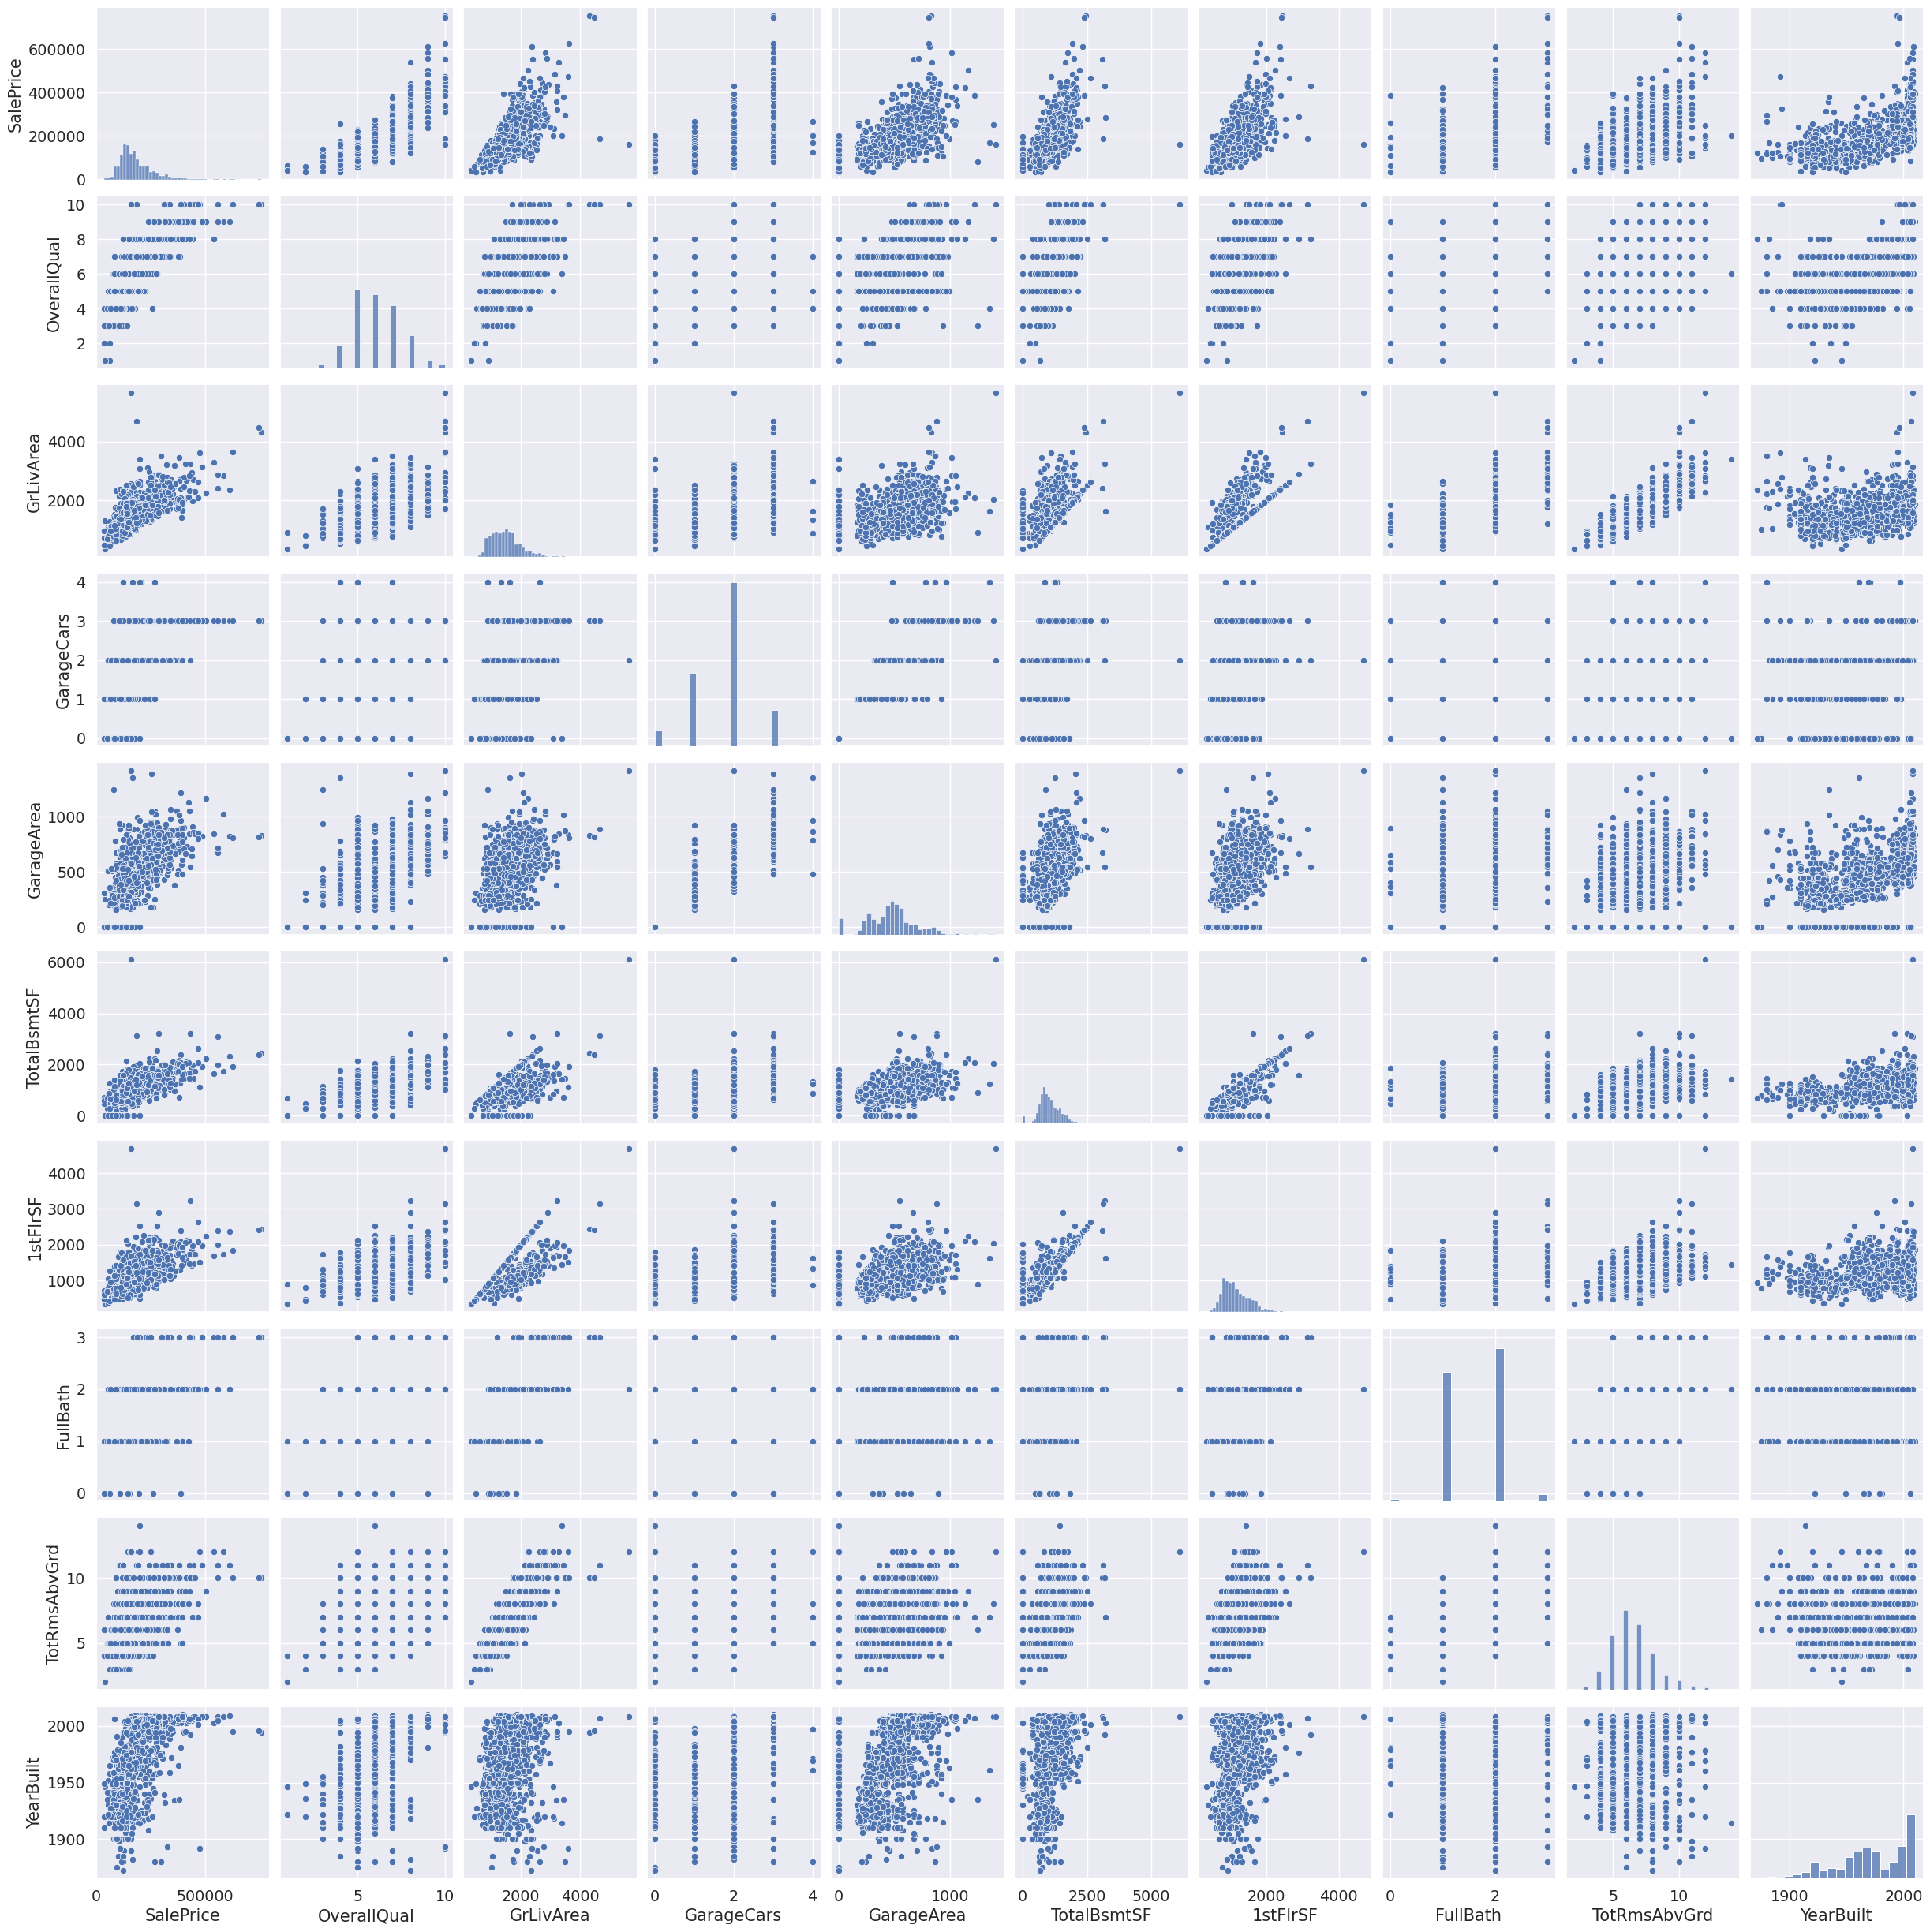

In [13]:
sns.pairplot(house[cls], size = 2.5)
plt.show();

In [14]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [15]:
#Here we can see the mapping in the text file provided for which NAN has some value for eg. none or not_a_feature

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [16]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [18]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


In [19]:
house.drop("LotFrontage", axis=1, inplace=True)
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [20]:
house.dropna(inplace=True)

In [21]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [22]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [23]:
numerical_values_train = list(num_train.index)
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [24]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Data Preparation

<Axes: xlabel='SalePrice', ylabel='Density'>

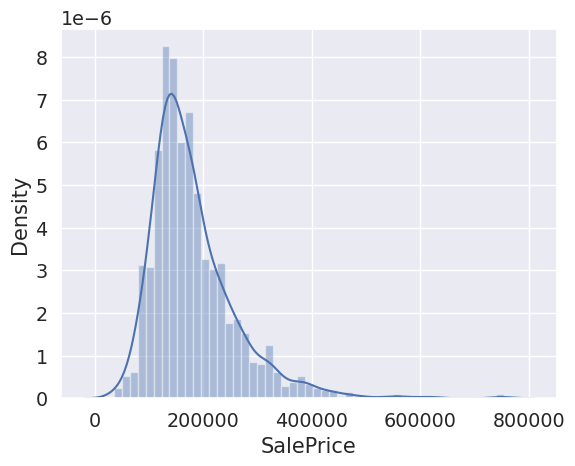

In [25]:
sns.distplot(house["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

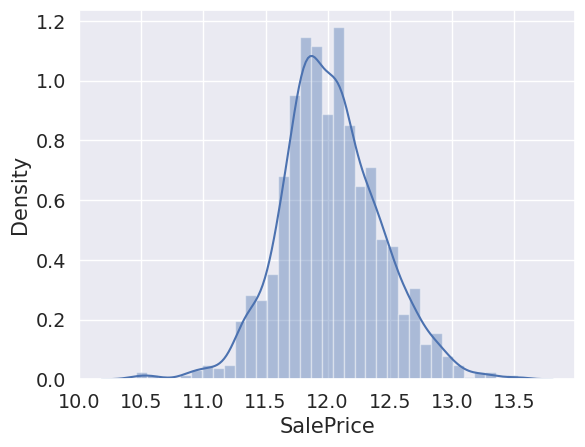

In [26]:
sns.distplot(np.log(house["SalePrice"]))

In [27]:
house["NewPrice"] = np.log(house["SalePrice"])

In [28]:
house["NewPrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: NewPrice, Length: 1459, dtype: float64

In [33]:
house["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [34]:
for i in categorical_values_train:
    print("i: ",i)
    feature_set = set(house[i])
    feature_set_in = set(house[i].index)
    print("feature_set:",feature_set)
    print("feature_set_in: ",feature_set_in)
    for j in feature_set:
        print("j:",j)
        feature_list = list(feature_set)
        print("feature_list:",feature_list)
        print("feature_list.index(j):",feature_list.index(j))
        house.loc[house[i] == j, i] = feature_list.index(j)

i:  MSZoning
feature_set: {'C (all)', 'RH', 'RM', 'FV', 'RL'}
feature_set_in:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 

#Model Building

In [35]:
X = house.drop(["Id", "SalePrice", "NewPrice"], axis=1).values
y = house["NewPrice"].values

In [36]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [32]:
X_train

array([[90, 'RL', 10125, ..., 2009, 'COD', 'Normal'],
       [190, 'RM', 11340, ..., 2010, 'WD', 'Normal'],
       [50, 'RL', 8405, ..., 2008, 'WD', 'Normal'],
       ...,
       [120, 'RL', 7820, ..., 2007, 'New', 'Partial'],
       [50, 'RM', 10440, ..., 2009, 'WD', 'Normal'],
       [60, 'RL', 9920, ..., 2007, 'WD', 'Normal']], dtype=object)

In [37]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9110769540065291
Testing R2
0.6600766471542898


In [38]:
lr = Lasso(alpha=0.005)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8788755522332129
Testing R2
0.8070629935343954


In [39]:
lr = Ridge(alpha=19.0)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8940283148726442
Testing R2
0.8181541497408811


In [40]:
lr.coef_

array([-7.23567812e-04,  4.23842886e-02,  1.86368022e-06, -2.00513273e-02,
       -8.63406471e-03, -9.56255765e-05,  1.98485185e-02,  6.20790001e-03,
        2.91440732e-03, -2.63834513e-02, -3.39484587e-03, -6.90753943e-03,
       -5.62778078e-03,  1.23025689e-02, -1.76204730e-03,  7.06685194e-02,
        4.82356981e-02,  2.01518062e-03,  1.06851334e-03, -1.59613148e-02,
       -1.88149767e-02,  1.83783724e-04, -1.94808139e-03, -5.25581022e-03,
        1.59380953e-05,  1.12261444e-02,  5.36147624e-03,  1.15767153e-02,
       -4.07826666e-03,  1.73483831e-03,  1.58551905e-03, -5.73476135e-03,
        3.04474659e-05,  1.00965704e-02,  4.89344796e-05, -4.12617921e-06,
        7.52557723e-05,  1.15222895e-02, -3.42350947e-03,  3.32519616e-02,
        1.93632496e-03,  1.32071313e-05,  4.16723138e-05,  1.24190771e-04,
        1.79070211e-04,  5.69742420e-02,  1.88621682e-02,  4.13108051e-02,
        1.41162049e-02, -3.14001677e-04, -2.99099129e-02, -7.48594663e-03,
        7.71667255e-03, -

In [41]:
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [42]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [43]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [44]:
pd.set_option('display.max_columns', None)

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081560,0.030563,0.006867,0.000674,0.0,{'alpha': 1e-08},0.929651,0.893302,0.805907,0.755687,0.857867,0.848483,0.061821,3,0.904076,0.911456,0.932998,0.912137,0.908217,0.913777,0.010025
1,0.072591,0.034868,0.004881,0.002523,0.0,{'alpha': 1e-07},0.929651,0.893302,0.805909,0.761647,0.857881,0.849678,0.060052,2,0.904076,0.911456,0.932998,0.912136,0.908217,0.913777,0.010025
2,0.074580,0.044599,0.008527,0.005562,0.000001,{'alpha': 1e-06},0.929651,0.893302,0.805930,0.813695,0.858019,0.860119,0.046972,1,0.904076,0.911456,0.932998,0.912130,0.908217,0.913775,0.010026
3,0.040396,0.005973,0.007108,0.002423,0.00001,{'alpha': 1e-05},0.929646,0.893301,0.806128,0.651308,0.859377,0.827952,0.097241,6,0.904075,0.911454,0.932997,0.911991,0.908216,0.913747,0.010030
4,0.039708,0.002973,0.006640,0.001906,0.0001,{'alpha': 0.0001},0.929418,0.893161,0.807378,0.650667,0.871946,0.830514,0.098289,5,0.903951,0.911334,0.932893,0.911895,0.908161,0.913647,0.010029


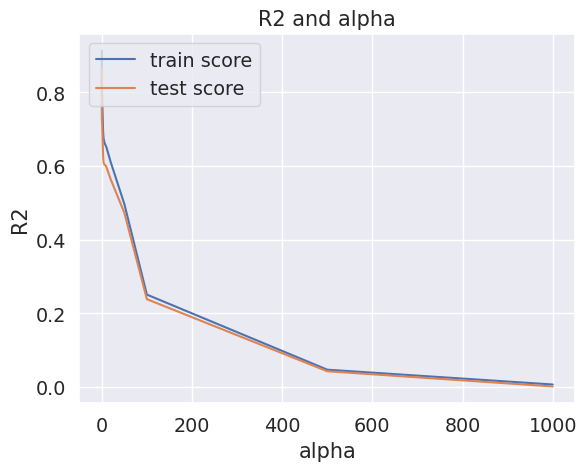

In [46]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [48]:
alpha = 50

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=50)

In [49]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  4.02426915e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.41724335e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.68173575e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [50]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080250,0.031195,0.012299,0.002093,0.0,{'alpha': 1e-08},-0.081181,-0.094189,-0.102072,-0.104240,-0.095276,-0.095392,0.008079,17,-0.084091,-0.08,-0.073899,-0.082045,-0.082196,-0.080446,0.003520
1,0.068944,0.016839,0.011547,0.002359,0.0,{'alpha': 1e-07},-0.081181,-0.094189,-0.102072,-0.104239,-0.095276,-0.095391,0.008078,16,-0.084091,-0.08,-0.073899,-0.082045,-0.082196,-0.080446,0.003520
2,0.050583,0.010844,0.010709,0.003519,0.000001,{'alpha': 1e-06},-0.081181,-0.094189,-0.102072,-0.104229,-0.095276,-0.095389,0.008076,15,-0.084091,-0.08,-0.073899,-0.082045,-0.082196,-0.080446,0.003520
3,0.052152,0.006788,0.009140,0.003931,0.00001,{'alpha': 1e-05},-0.081181,-0.094189,-0.102072,-0.104127,-0.095276,-0.095369,0.008054,14,-0.084091,-0.08,-0.073899,-0.082045,-0.082196,-0.080446,0.003520
4,0.053650,0.007112,0.012196,0.002827,0.0001,{'alpha': 0.0001},-0.081182,-0.094189,-0.102072,-0.103149,-0.095276,-0.095173,0.007848,11,-0.084091,-0.08,-0.073899,-0.082049,-0.082196,-0.080447,0.003521


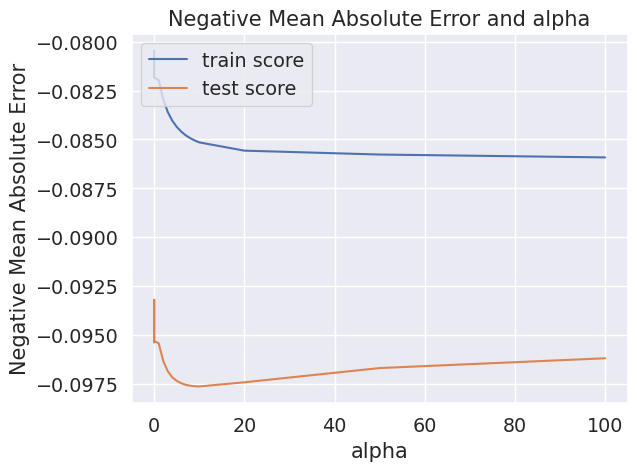

In [52]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [53]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.97892284e-04,  4.22637995e-02,  1.86168683e-06, -3.26523037e-02,
       -8.93172347e-03, -4.35936480e-04,  1.92091789e-02,  1.16717462e-02,
        2.73820672e-03, -2.88668055e-02, -3.36028497e-03, -6.62260409e-03,
       -5.97214130e-03,  1.19190992e-02, -1.94811147e-03,  7.01428252e-02,
        4.90415324e-02,  1.96040703e-03,  1.03366996e-03, -1.64364186e-02,
       -1.96608234e-02,  2.67404691e-04, -2.06846749e-03, -5.78750037e-03,
        1.76833587e-05,  1.11649546e-02,  5.63095434e-03,  1.17369919e-02,
       -3.59684664e-03,  1.79083266e-03,  1.80164018e-03, -5.21896998e-03,
        3.12739731e-05,  1.06320092e-02,  5.02586265e-05, -3.21840659e-06,
        7.83142037e-05,  1.15146752e-02, -3.24423029e-03,  3.67383042e-02,
        2.76882410e-03,  1.65061942e-05,  4.23076523e-05,  1.14755770e-04,
        1.73569605e-04,  5.99802230e-02,  2.16503703e-02,  4.48587039e-02,
        1.66098662e-02, -7.02413692e-04, -3.80898985e-02, -7.65819366e-03,
        8.28602648e-03, -